In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV

In [2]:
file_path = "C:\\Users\\91755\\Desktop\\Decision Tree\\Decision Tree\\heart_disease.xlsx"
xls = pd.ExcelFile(file_path)
print(xls.sheet_names)  # Check sheet names

['Description', 'Heart_disease']


In [5]:
df = pd.read_excel(file_path, sheet_name="Heart_disease", header=1)  
print(df.head())

   63  Male   typical angina  145  233   True  lv hypertrophy  150  False  \
0  41  Male  atypical angina  135  203  False          normal  132  False   
1  57  Male     asymptomatic  140  192  False          normal  148  False   
2  52  Male   typical angina  118  186  False  lv hypertrophy  190  False   
3  57  Male     asymptomatic  110  201  False          normal  126   True   
4  66  Male     asymptomatic  160  228  False  lv hypertrophy  138  False   

   2.3 downsloping  fixed defect  0.1  
0  0.0        flat  fixed defect    0  
1  0.4        flat  fixed defect    0  
2  0.0        flat  fixed defect    0  
3  1.5        flat  fixed defect    0  
4  2.3   upsloping  fixed defect    0  


In [7]:
df = pd.read_excel(file_path, sheet_name="Heart_disease", engine="openpyxl")
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
0,63,Male,typical angina,145,233,True,lv hypertrophy,150,False,2.3,downsloping,fixed defect,0
1,41,Male,atypical angina,135,203,False,normal,132,False,0.0,flat,fixed defect,0
2,57,Male,asymptomatic,140,192,False,normal,148,False,0.4,flat,fixed defect,0
3,52,Male,typical angina,118,186,False,lv hypertrophy,190,False,0.0,flat,fixed defect,0
4,57,Male,asymptomatic,110,201,False,normal,126,True,1.5,flat,fixed defect,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
903,53,Male,asymptomatic,125,0,False,normal,120,False,1.5,upsloping,reversable defect,4
904,62,Male,asymptomatic,166,170,False,st-t abnormality,120,True,3.0,flat,reversable defect,4
905,56,Male,non-anginal,170,0,False,lv hypertrophy,123,True,2.5,downsloping,normal,4
906,56,Male,non-anginal,144,208,True,st-t abnormality,105,TURE,NaN,downsloping,fixed defect,4


In [9]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
0,63,Male,typical angina,145,233,True,lv hypertrophy,150,False,2.3,downsloping,fixed defect,0
1,41,Male,atypical angina,135,203,False,normal,132,False,0.0,flat,fixed defect,0
2,57,Male,asymptomatic,140,192,False,normal,148,False,0.4,flat,fixed defect,0
3,52,Male,typical angina,118,186,False,lv hypertrophy,190,False,0.0,flat,fixed defect,0
4,57,Male,asymptomatic,110,201,False,normal,126,True,1.5,flat,fixed defect,0


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 908 entries, 0 to 907
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       908 non-null    int64  
 1   sex       908 non-null    object 
 2   cp        908 non-null    object 
 3   trestbps  908 non-null    int64  
 4   chol      908 non-null    int64  
 5   fbs       908 non-null    bool   
 6   restecg   908 non-null    object 
 7   thalch    908 non-null    int64  
 8   exang     908 non-null    object 
 9   oldpeak   846 non-null    float64
 10  slope     908 non-null    object 
 11  thal      908 non-null    object 
 12  num       908 non-null    int64  
dtypes: bool(1), float64(1), int64(5), object(6)
memory usage: 86.1+ KB


In [13]:
# Check for missing values
# Fill numeric columns with median
df.fillna(df.select_dtypes(include=[np.number]).median(), inplace=True)

# Fill categorical columns with mode
for col in df.select_dtypes(include=['object']).columns:
    df[col] = df[col].fillna(df[col].mode()[0])
df[col]

0           fixed defect
1           fixed defect
2           fixed defect
3           fixed defect
4           fixed defect
             ...        
903    reversable defect
904    reversable defect
905               normal
906         fixed defect
907    reversable defect
Name: thal, Length: 908, dtype: object

In [15]:
df.describe()

,age,trestbps,chol,thalch,oldpeak,num
count,908.000000,908.000000,908.000000,908.000000,908.000000,908.000000
mean,53.791850,133.430617,201.484581,135.957048,0.864537,1.008811
std,9.158031,20.401608,112.097949,26.804929,1.060433,1.144436
min,29.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.750000,120.000000,176.750000,118.000000,0.000000,0.000000
50%,54.000000,130.000000,224.000000,138.000000,0.500000,1.000000
75%,60.000000,144.000000,270.000000,156.000000,1.500000,2.000000
max,77.000000,200.000000,603.000000,202.000000,6.200000,4.000000


In [17]:
# Checking for missing values
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalch      0
exang       0
oldpeak     0
slope       0
thal        0
num         0
dtype: int64

In [25]:
df_corr.dtypes

age           int64
sex          object
cp           object
trestbps      int64
chol          int64
fbs            bool
restecg      object
thalch        int64
exang        object
oldpeak     float64
slope        object
thal         object
num           int64
dtype: object

In [23]:
# Convert categorical and boolean columns to numerical for correlation heatmap
df_corr = df.copy()
df_corr

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
0,63,Male,typical angina,145,233,True,lv hypertrophy,150,False,2.3,downsloping,fixed defect,0
1,41,Male,atypical angina,135,203,False,normal,132,False,0.0,flat,fixed defect,0
2,57,Male,asymptomatic,140,192,False,normal,148,False,0.4,flat,fixed defect,0
3,52,Male,typical angina,118,186,False,lv hypertrophy,190,False,0.0,flat,fixed defect,0
4,57,Male,asymptomatic,110,201,False,normal,126,True,1.5,flat,fixed defect,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
903,53,Male,asymptomatic,125,0,False,normal,120,False,1.5,upsloping,reversable defect,4
904,62,Male,asymptomatic,166,170,False,st-t abnormality,120,True,3.0,flat,reversable defect,4
905,56,Male,non-anginal,170,0,False,lv hypertrophy,123,True,2.5,downsloping,normal,4
906,56,Male,non-anginal,144,208,True,st-t abnormality,105,TURE,0.5,downsloping,fixed defect,4


In [27]:
# Encode categorical variables
label_encoders = {}
for col in ['sex', 'cp', 'restecg', 'slope', 'thal']:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le
label_encoders[col]

LabelEncoder()

In [29]:
# Standardizing numerical features
scaler = StandardScaler()
num_cols = ['age', 'trestbps', 'chol', 'thalch', 'oldpeak']
df[num_cols] = scaler.fit_transform(df[num_cols])
df[num_cols]

,age,trestbps,chol,thalch,oldpeak
0,1.006027,0.567394,0.281297,0.524183,1.354403
1,-1.397560,0.076967,0.013526,-0.147705,-0.815718
2,0.350503,0.322181,-0.084656,0.449529,-0.438305
3,-0.195767,-0.756760,-0.138211,2.017268,-0.815718
4,0.350503,-1.149102,-0.004325,-0.371668,0.599578
...,...,...,...,...,...
903,-0.086513,-0.413461,-1.798388,-0.595631,0.599578
904,0.896773,1.597292,-0.281021,-0.595631,2.014874
905,0.241249,1.793463,-1.798388,-0.483649,1.543109
906,0.241249,0.518352,0.058155,-1.155538,-0.343952


In [31]:
# Splitting the dataset
X = df.drop(columns=['num'])  # Target column
y = df['num']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_test, y_train, y_test

(          age  sex  cp  trestbps      chol    fbs  restecg    thalch  exang  \
 84  -1.288306    1   1 -0.658674  0.834689  False        1  0.972109  False   
 10  -2.599354    0   3  1.793463  0.316999  False        2  1.270726  False   
 617  2.207820    1   2  0.322181  0.316999   True        1 -1.566136  False   
 250 -1.397560    1   0 -1.443359 -1.798388  False        2 -0.931575  False   
 869 -0.523529    1   2  0.175052 -0.530941  False        1 -2.536642  FALSE   
 ..        ...  ...  ..       ...       ...    ...      ...       ...    ...   
 106  1.006027    0   2  0.076967  0.450885  False        0  1.345380  False   
 270 -1.834576    0   1 -0.658674  0.522290  False        1 -0.222360  False   
 860 -0.632783    1   0  0.322181  1.539818  False        1  0.860127   True   
 435  0.350503    1   1  1.008779  0.272371  False        0  1.046763  False   
 102  0.678265    0   3  0.812608  0.343777  False        1  1.308053  False   
 
       oldpeak  slope  thal  
 84  -0.

In [95]:
# Ensure boolean values are converted to numeric
df = df.replace({'TURE': 1, 'TRUE': 1, 'FALSE': 0, True: 1, False: 0}).infer_objects(copy=False)


# Encode categorical variables
categorical_cols = ['sex', 'cp', 'restecg', 'slope', 'thal']
label_encoders = {}
for col in categorical_cols:
    if df[col].dtype == 'object':  # Only encode object-type columns
        le = LabelEncoder()
        df[col] = le.fit_transform(df[col])
        label_encoders[col] = le

# Ensure all features are numeric before training
X = df.drop(columns=['num'])  # Update target column name if different
y = df['num']

# Check if any column still has non-numeric values
print(X.dtypes)  # All columns should be numeric

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


age         float64
sex           int64
cp            int64
trestbps    float64
chol        float64
fbs           int64
restecg       int64
thalch      float64
exang         int64
oldpeak     float64
slope         int64
thal          int64
dtype: object


In [39]:
X_train.dtypes

age         float64
sex           int32
cp            int32
trestbps    float64
chol        float64
fbs            bool
restecg       int32
thalch      float64
exang        object
oldpeak     float64
slope         int32
thal          int32
dtype: object

In [41]:
X_train.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal
84,-1.288306,1,1,-0.658674,0.834689,False,1,0.972109,False,-0.815718,2,1
10,-2.599354,0,3,1.793463,0.316999,False,2,1.270726,False,-0.815718,0,0
617,2.207820,1,2,0.322181,0.316999,True,1,-1.566136,False,-0.815718,2,2
250,-1.397560,1,0,-1.443359,-1.798388,False,2,-0.931575,False,-0.815718,1,1
869,-0.523529,1,2,0.175052,-0.530941,False,1,-2.536642,FALSE,-0.343952,1,1


In [51]:
X_train = X_train.astype({col: int for col in X_train.select_dtypes(include=['bool']).columns})
X_train
X_test = X_test.astype({col: int for col in X_test.select_dtypes(include=['bool']).columns})
X_test 

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal
865,1.006027,1,2,-0.168247,-1.798388,0,2,-0.931575,True,-0.815718,1,2
439,0.459757,1,0,1.793463,-1.798388,1,2,-1.155538,True,-0.815718,0,1
342,-1.397560,1,1,-0.658674,0.798987,0,2,0.897454,False,-0.815718,0,1
736,0.787519,1,0,0.616437,0.352702,0,1,0.449529,True,2.014874,0,0
785,0.022741,1,0,-1.149102,0.040303,0,0,-1.043556,True,-0.815718,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
580,-0.195767,1,0,0.322181,0.575844,0,1,-0.073051,True,1.071344,1,0
868,1.224535,1,0,-0.364418,0.986426,0,0,0.748146,FALSE,-0.343952,0,1
445,-0.086513,1,0,0.322181,0.013526,1,0,0.710819,True,2.109227,0,2
786,0.022741,1,0,-0.560589,0.754358,0,0,-0.744939,True,2.203581,1,1


In [77]:
for col in df.select_dtypes(include=['bool']).columns:
    df[col] = df[col].astype(int)

In [79]:
from sklearn.preprocessing import LabelEncoder

label_encoders = {}
for col in df.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col].astype(str))  # Convert to string first
    label_encoders[col] = le

In [81]:
print(df.dtypes)

age         float64
sex           int32
cp            int32
trestbps    float64
chol        float64
fbs           int32
restecg       int32
thalch      float64
exang         int32
oldpeak     float64
slope         int32
thal          int32
num           int64
dtype: object


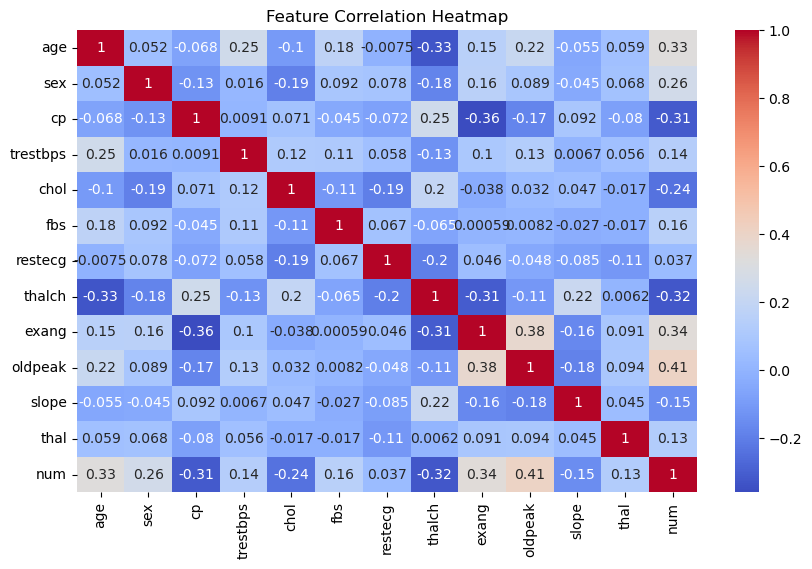

In [83]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Feature Correlation Heatmap")
plt.show()

In [97]:
df.replace({'TRUE': 1, 'FALSE': 0, 'TURE': 1}, inplace=True)  # Fix typos too

In [99]:
from sklearn.preprocessing import LabelEncoder

label_encoders = {}
for col in df.select_dtypes(include=['object']).columns:  # Select object-type columns
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col].astype(str))  # Convert to string first
    label_encoders[col] = le


In [101]:
print(df.dtypes)

age         float64
sex           int32
cp            int32
trestbps    float64
chol        float64
fbs           int32
restecg       int32
thalch      float64
exang         int32
oldpeak     float64
slope         int32
thal          int32
num           int64
dtype: object


In [ ]:
Interview Questions:
1. What are some common hyperparameters of decision tree models, and how do they affect the model's performance?
-->Common Hyperparameters of Decision Tree Models & Their Effects:
max_depth: Limits tree depth; prevents overfitting.
min_samples_split: Minimum samples required to split a node; higher values reduce overfitting.
min_samples_leaf: Minimum samples in a leaf; larger values create a smoother model.
max_features: Number of features to consider at each split; controls model complexity.
criterion (gini or entropy): Defines how nodes are split; affects purity of splits.

2. What is the difference between the Label encoding and One-hot encoding?
-->Label Encoding: Assigns a unique numerical value to each category (e.g., "Red" → 0, "Blue" → 1). Useful for ordinal data but may introduce unintended order.
One-Hot Encoding: Creates binary columns for each category (e.g., "Red" → [1,0,0], "Blue" → [0,1,0]). Prevents order-related issues but increases dimensionality.